Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data sets

In [3]:
#Source : World Health organization
df1=pd.read_csv(r'C:\Users\Piyush\Documents\PDS Project\Data Sets\country_vaccinations.csv')
df1.head()

df2=pd.read_csv(r'C:\Users\Piyush\Documents\PDS Project\Data Sets\COVID19_India.csv')
df2.head()

df3=pd.read_csv(r'C:\Users\Piyush\Documents\PDS Project\Data Sets\StatewiseTestingDetails.csv')
df3.head()


df1.drop(['source_name', 'source_website'], axis=1, inplace=True)
df1.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Handling Missing Values (By Interpolation)

In [4]:
# Select only numerical columns
numeric_df = df2.select_dtypes(include=['number'])

# Interpolate and fill missing values in the numerical columns
numeric_df_filled = numeric_df.interpolate(method='linear', axis=0).fillna(method='ffill').fillna(method='bfill')

# Replace the numerical columns in the original DataFrame with the filled ones
df2[numeric_df.columns] = numeric_df_filled

df2.head()


C:\Users\Piyush\AppData\Local\Temp\ipykernel_11164\159678766.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numeric_df_filled = numeric_df.interpolate(method='linear', axis=0).fillna(method='ffill').fillna(method='bfill')


,date,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_cases_smoothed,new_deaths_smoothed
0,30-01-20,India,1,1,1.0,0,6500.0,191.0,191181.0,191181.0,7668.0,191181.0,0.429,0.429
1,31-01-20,India,1,0,1.0,0,6500.0,191.0,191181.0,191181.0,7668.0,191181.0,0.429,0.429
2,01-02-20,India,1,0,1.0,0,6500.0,191.0,191181.0,191181.0,7668.0,191181.0,0.429,0.429
3,02-02-20,India,2,1,1.0,0,6500.0,191.0,191181.0,191181.0,7668.0,191181.0,0.429,0.429
4,03-02-20,India,3,1,1.0,0,6500.0,191.0,191181.0,191181.0,7668.0,191181.0,0.429,0.429


Plotting a line chart - Total cases vs Deaths

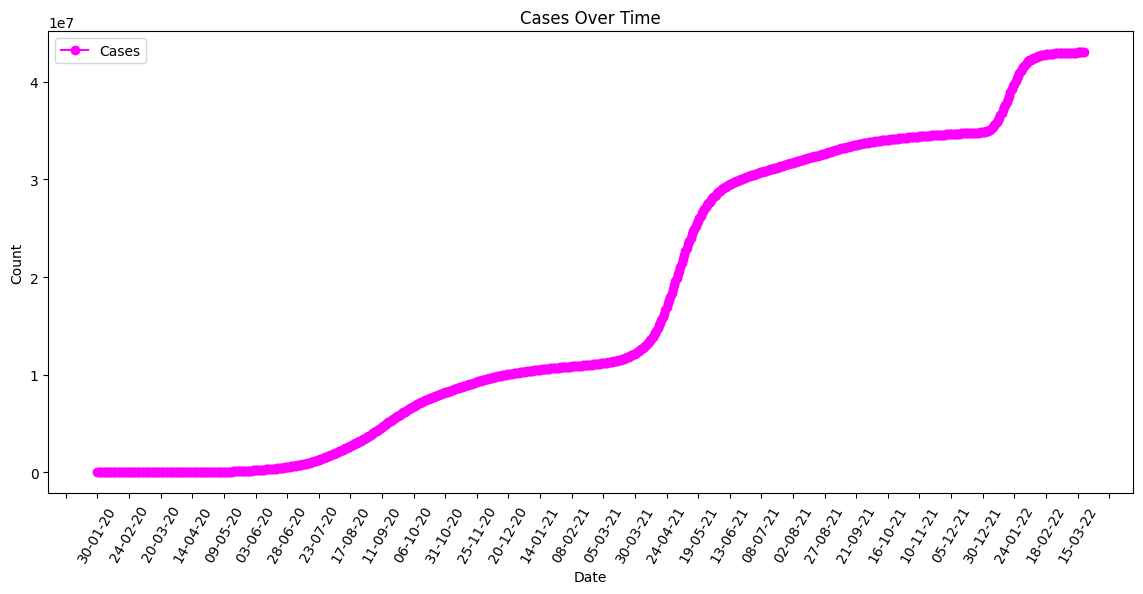

In [5]:
plt.figure(figsize=(14,6))
plt.plot(df2['date'],df2['total_cases'], label='Cases', color='magenta', marker='o')
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(40))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Cases Over Time')
plt.legend()
plt.show()

#This graph shows us the pattern in which cases were registerded in India till March 2022. As we can observe, there are 3 spikes so we can confirm there were 3 waves of different virus vairants


Positivity Rate vs New Cases wrt Dates

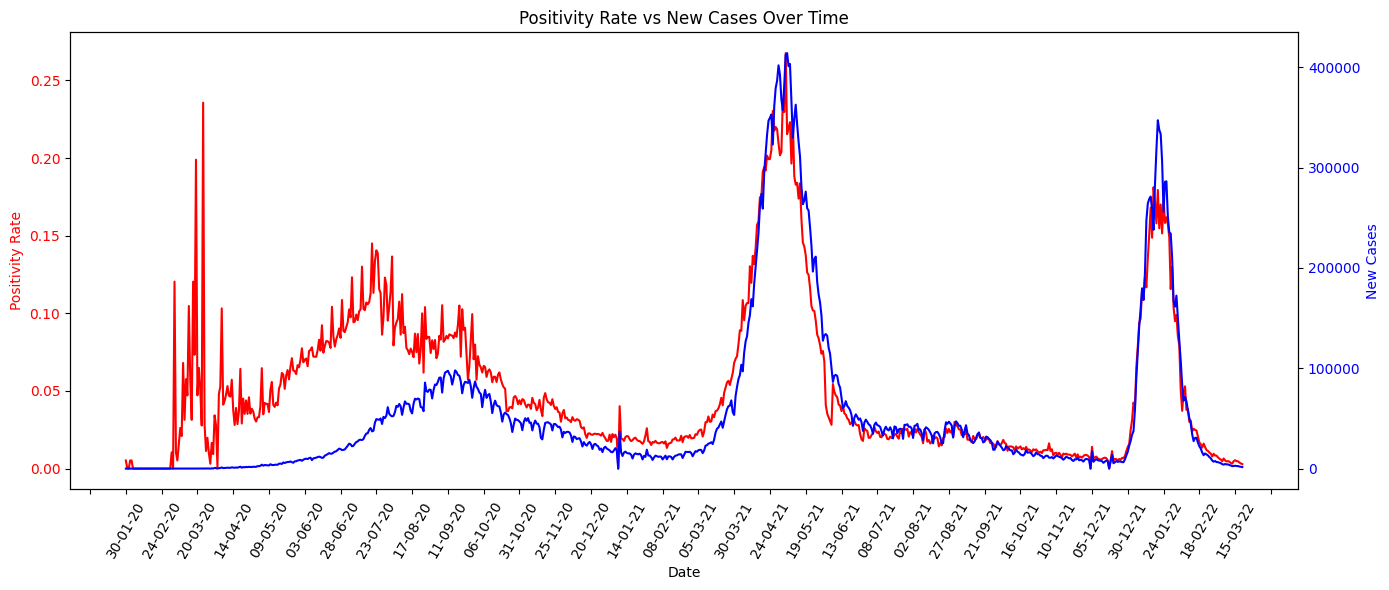

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 already has 'new_cases' and 'new_tests' columns
# Adding a column for positivity rate
df2['positivity_rate'] = df2['new_cases'] / df2['new_tests']

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Positivity Rate on the left y-axis
ax1.plot(df2['date'], df2['positivity_rate'], label="Positivity Rate", color="red")
ax1.set_xlabel('Date')
ax1.set_ylabel('Positivity Rate', color="red")
ax1.tick_params(axis='y', labelcolor="red")

# Format x-axis labels and set the tick locator
ax1.tick_params(axis='x', rotation=60)
ax1.xaxis.set_major_locator(plt.MaxNLocator(40))

# Plot New Cases on the right y-axis
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(df2['date'], df2['new_cases'], label="New Cases", color="blue")
ax2.set_ylabel('New Cases', color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Title and layout adjustments
plt.title('Positivity Rate vs New Cases Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap

plt.show()


Positive to Negative Cases Statewise India

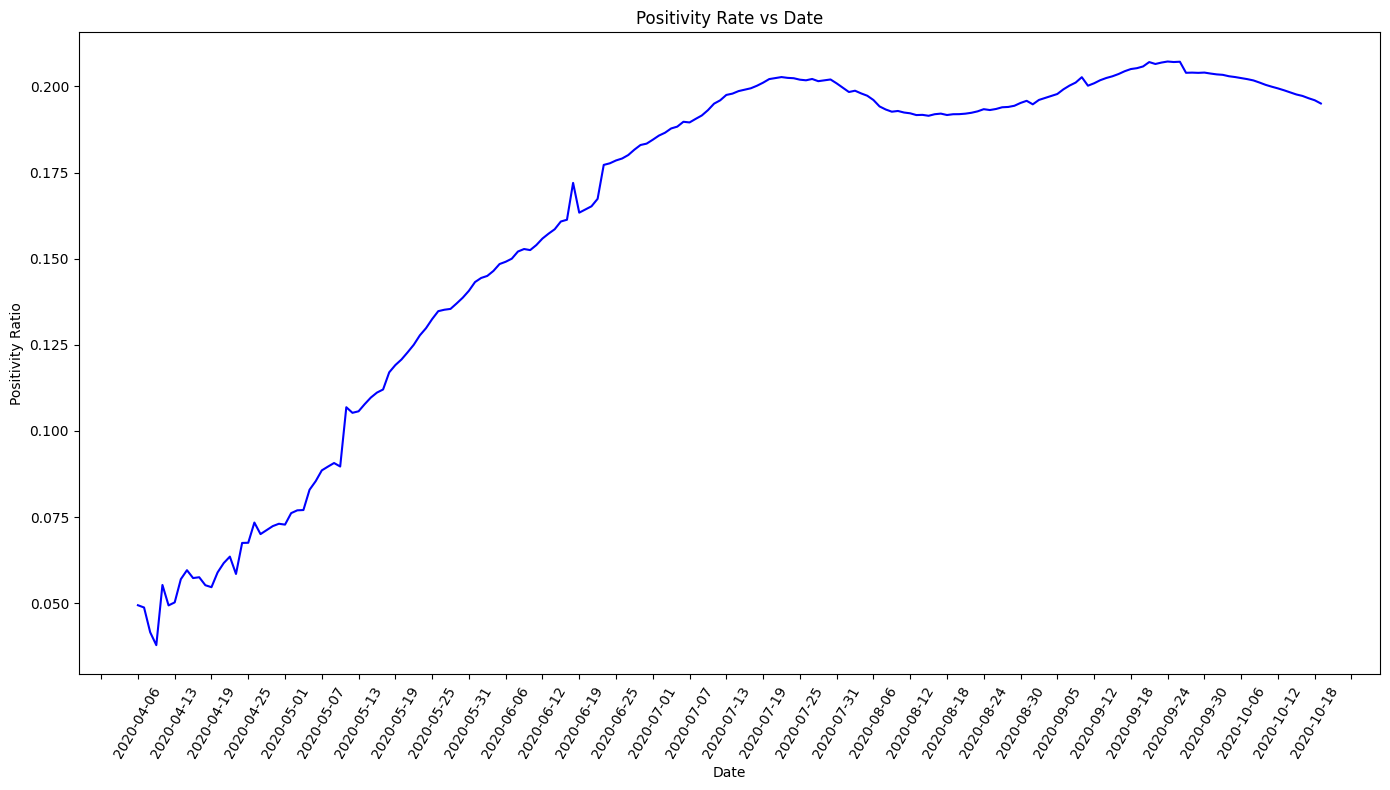

,Date,State,TotalSamples,Negative,Positive,Positivity Ratio
8889,2020-04-06,Maharashtra,17563.0,15808,868.0,0.049422
8890,2020-04-07,Maharashtra,20877.0,19290,1018.0,0.048762
8891,2020-04-09,Maharashtra,20877.0,19290,868.0,0.041577
8892,2020-04-10,Maharashtra,30000.0,28865,1135.0,0.037833
8893,2020-04-11,Maharashtra,31841.0,30477,1761.0,0.055306
...,...,...,...,...,...,...
9079,2020-10-15,Maharashtra,7914651.0,6350036,1564615.0,0.197686
9080,2020-10-16,Maharashtra,7989693.0,6413631,1576062.0,0.197262
9081,2020-10-17,Maharashtra,8069100.0,6482779,1586321.0,0.196592
9082,2020-10-18,Maharashtra,8139466.0,6544085,1595381.0,0.196006


In [14]:
# Create a filtered DataFrame for Maharashtra and calculate Positivity Ratio
df3_maharashtra = df3[df3['State'] == 'Maharashtra'].copy()
df3_maharashtra['Positivity Ratio'] = df3_maharashtra['Positive'] / df3_maharashtra['TotalSamples']

# Drop null values safely
df3_maharashtra = df3_maharashtra.dropna()

# Plotting
plt.figure(figsize=(14, 8))

# Plot the Positivity Ratio over Date
plt.plot(df3_maharashtra['Date'], df3_maharashtra['Positivity Ratio'], color="blue")
plt.xlabel('Date')
plt.ylabel('Positivity Ratio')
plt.title('Positivity Rate vs Date')

# Rotate x-axis labels
plt.tick_params(axis='x', rotation=60)

# Set the major locator for x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(40))  # Apply to the current x-axis

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

# Display the DataFrame
df3_maharashtra


In [15]:
df1.head()

df1_last_rows = df1.groupby('country').tail(1)

df1_last_rows

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
393,Afghanistan,AFG,2022-03-22,5751015.0,5082824.0,4420127.0,NaN,6319.0,14.44,12.76,11.10,159.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
832,Albania,ALB,2022-03-24,2754244.0,1278902.0,1215199.0,NaN,1821.0,95.87,44.52,42.30,634.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ..."
1237,Algeria,DZA,2022-03-09,13704895.0,7461932.0,6110712.0,NaN,4307.0,30.72,16.72,13.70,97.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
1650,Andorra,AND,2022-03-13,151997.0,57817.0,53367.0,NaN,34.0,196.50,74.74,68.99,440.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
2040,Angola,AGO,2022-03-25,17535411.0,11235059.0,5993792.0,NaN,34171.0,51.68,33.11,17.66,1007.0,Oxford/AstraZeneca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85073,Wales,OWID_WLS,2022-03-28,6927437.0,2528664.0,2399341.0,2254.0,1609.0,218.53,79.77,75.69,508.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
85444,Wallis and Futuna,WLF,2022-03-28,13073.0,NaN,NaN,NaN,19.0,117.84,NaN,NaN,1713.0,Moderna
85756,Yemen,YEM,2022-03-16,807502.0,643501.0,404781.0,NaN,2271.0,2.65,2.11,1.33,74.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac"
86106,Zambia,ZMB,2022-03-29,3402612.0,NaN,2182849.0,12073.0,13650.0,17.98,NaN,11.54,721.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm..."
